We need a model of:
# of new cases / cases
	(include factor f1 for rate of testing of mild/moderate and f2 for severe cases)
	use 2.5 day doubling period (adjustable of course)
# of mild/moderate; hospitalizations; ICU cases
	(include both number of cases and disease progression)
	This can be quite rough. Use a typical progression period. 
	Fractions: after progression 80% mild/moderate, 20% hospitalization: 14% severe, 6% ICU (20=14+6)

# Model: 
    N total population

# In each time step:
    n1 daily testing
    p1 probability of positive cases
    p2 probability of mild cases, 1-p2 probability of severe cases
    In the severe cases: p3 probability of hospitalization, 1-p3 probability of ICU cases
    
# Progression periods:
    pp1, pp2, pp3,pp4
    
    After pp1: previously negative cases will be tested again
    
    After pp2 time steps: p4 probability of mild--->recovered, 1-p4 probability of mild-->severe
    After pp3 time steps: p5 probability of hospitalized-->recovered, 1-p5 probability of hospitilized-->ICU_hospitalized
    After pp4 time steps: p6 probability of ICU_hospitalized-->recovered, 1-p6 probability of ICU_hospitalized-->deatch
    
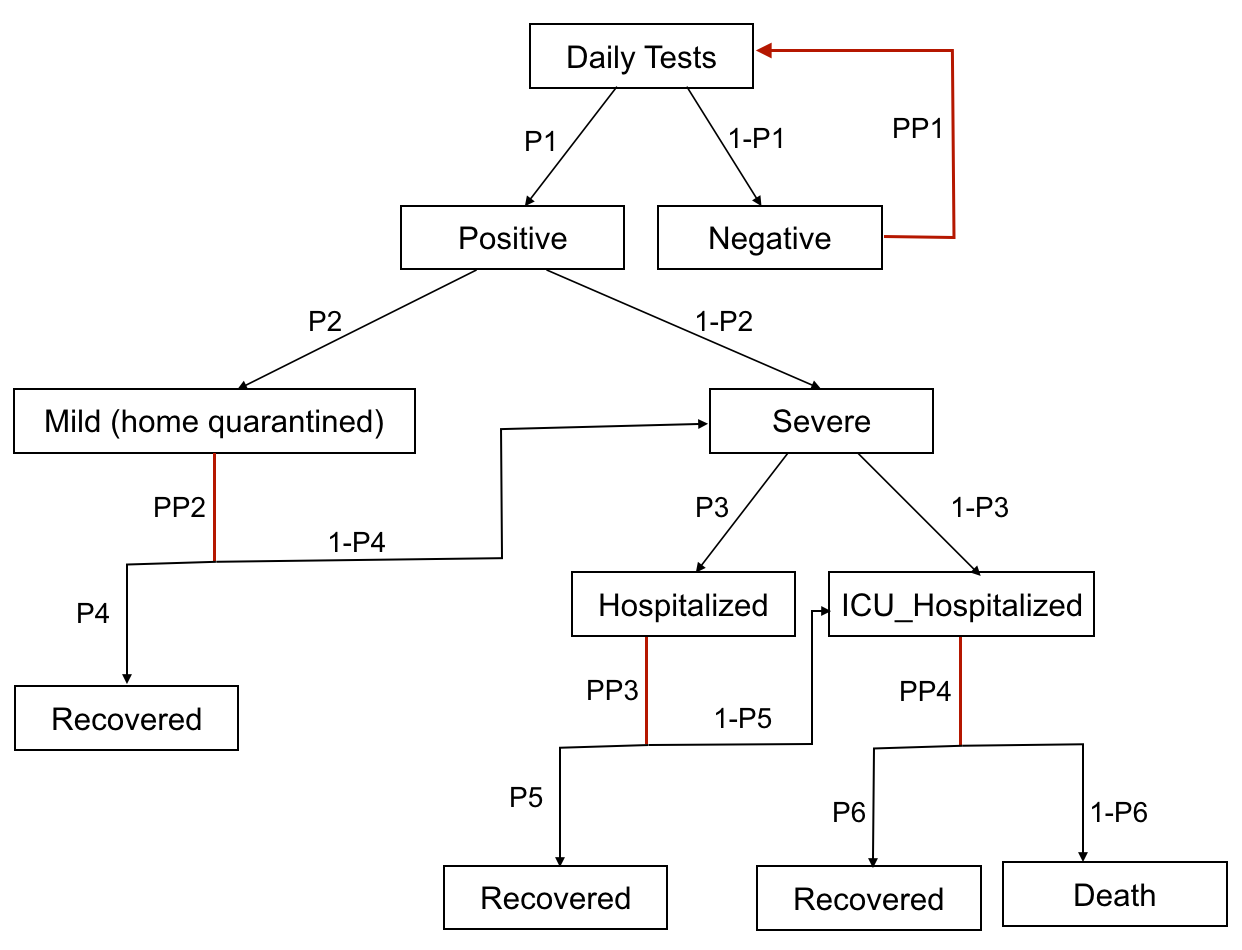 

In [12]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
%matplotlib notebook

In [43]:
# Initial values

N = 1000000
n1 = 1000

# Progression periods
pp1 = 7
pp2 = 5
pp3 = 5
pp4 = 5

# Probabilities
p1 = 0.2
p2 = 0.8
p3 = 0.8
p4 = 0.6
p5 = 0.6
p6 = 0.2

In [44]:
non_tested,recovered,death = list(range(N)),[],[]
negative, mild,hospitalized, icu = {},{},{},{}

n_non_tested,n_recovered,n_death,n_negative,n_mild,n_hospitalized,n_icu,n_positive=[],[],[],[],[],[],[],[]

np.random.seed(0)

for time in range(100):
    
    # Update of previous cases ---------------------------
    rq0,rq1,rq2,rq3 = [],[],[],[]
    if len(negative)>0:     # negative-->non_tested
        for r in negative.keys():
            if negative[r] >= pp1: 
                non_tested.append(r) # back to non_tested
                rq0.append(r)
            else: negative[r] = negative[r]+1
        
        if len(rq0)>0:           # Remove from the negative dic
            for p in rq0: del(negative[p])
    
    if len(mild)>0:      #mild-->recovered or severe(hospitalized/icu)
        for r in mild.keys():
            if mild[r] >= pp2: 
                rq1.append(r) 
                j = np.random.random()
                if j <= p4: 
                    recovered.append(r)    # recovered
                else: 
                    k = np.random.random()
                    if k <= p3: hospitalized[r] = 0     #hospitalized
                    else: icu[r] = 0     #icu
            else: mild[r] = mild[r]+1
        if len(rq1)>0:          # Remove from the mild dic
            for p in rq1: del(mild[p])
    
    if len(hospitalized)>0:     #hospitalized-->recovered or icu
        for r in hospitalized.keys():
            if hospitalized[r]>=pp3:
                rq2.append(r)
                j = np.random.random()
                if j <= p5: recovered.append(r)    # recovered
                else: icu[r] = 0     #icu
            else: hospitalized[r] = hospitalized[r]+1
        if len(rq2)>0:              # Remove from the hospitalized dic
            for p in rq2: del(hospitalized[p])
                    
    if len(icu)>0:   #icu-->recovered or death
        for r in icu.keys():
            if icu[r] >=pp4:
                rq3.append(r)
                j = np.random.random()
                if j <= p6: recovered.append(r)    # recovered
                else: death.append(r)     #death  
            else: icu[r] = icu[r]+1
        if len(rq3)>0:    # Remove from the icu dic
            for p in rq3: del(icu[p])
    
    # New cases -----------------------------------------
    ii = np.random.choice(len(non_tested),size=n1,replace=False) #non_repititive random choices from individuals
    i = np.random.random(size=n1)
    
    rr = [non_tested[m] for m in ii]
    
    nd = -1
    er1 = 0
    for test in ii:
        nd += 1
        
        if i[nd] > p1: negative[non_tested[test]] = 0    # negative
        else:
            er1 += 1
            j = np.random.random()
            if j <= p2: mild[non_tested[test]] = 0    # mild
            else: 
                k = np.random.random()
                if k <= p3: hospitalized[non_tested[test]] = 0     #hospitalized
                else: icu[non_tested[test]] = 0     #icu
    
    ww = [non_tested[e] for e in ii]    # # Remove from the non_tested list
    for e in ww: non_tested.remove(e)   
    n_positive.append(er1)
    
    print(time)
    n_non_tested.append(len(non_tested))
    n_recovered.append(len(recovered))
    n_death.append(len(death))
    n_negative.append(len(negative))
    n_mild.append(len(mild))
    n_hospitalized.append(len(hospitalized))
    n_icu.append(len(icu))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


<IPython.core.display.Javascript object>


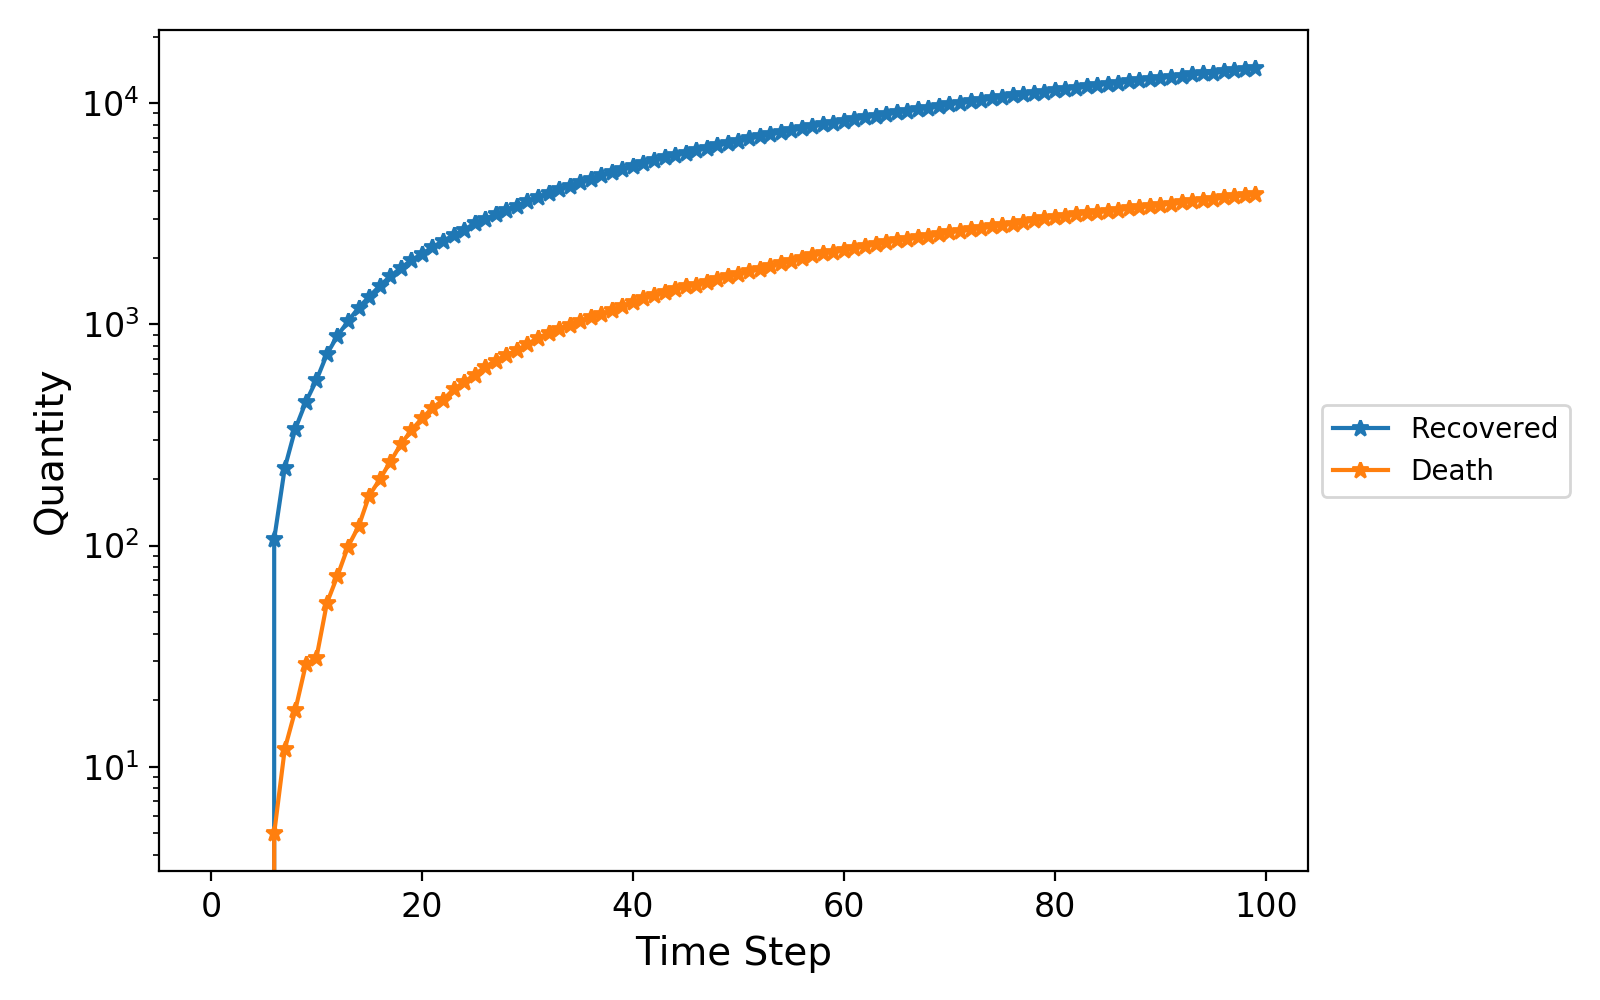

<IPython.core.display.Javascript object>


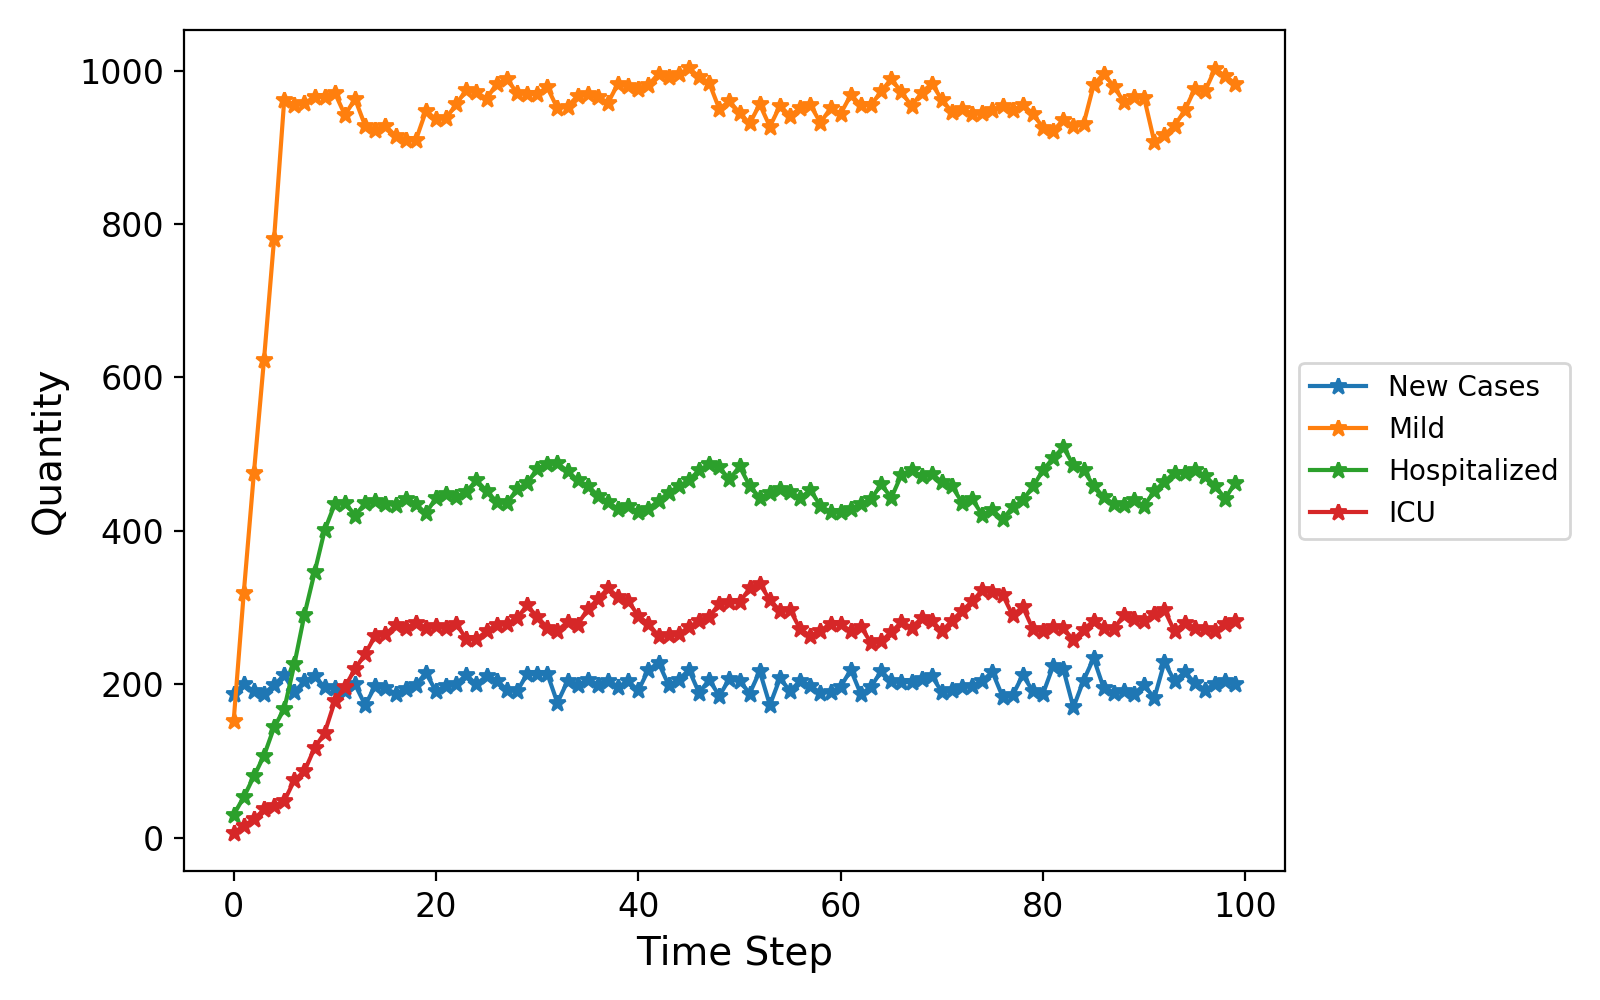

In [57]:
pl.figure(figsize=(8,5))
pl.plot(range(time+1),n_recovered,'*-',label='Recovered')
pl.plot(range(time+1),n_death,'*-',label='Death')
pl.ylabel('Quantity',fontsize=14)
pl.xlabel('Time Step',fontsize=14)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#pl.yscale("log")
pl.tight_layout()

pl.figure(figsize=(8,5))
#pl.plot(range(time+1),n_negative,'*-',label='Negative')
pl.plot(range(time+1),n_positive,'*-',label='New Cases') #np.cumsum(
pl.plot(range(time+1),n_mild,'*-',label='Mild')
pl.plot(range(time+1),n_hospitalized,'*-',label='Hospitalized')
pl.plot(range(time+1),n_icu,'*-',label='ICU')

pl.ylabel('Quantity',fontsize=14)
pl.xlabel('Time Step',fontsize=14)
pl.xticks(fontsize=12)
pl.yticks(fontsize=12)
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.tight_layout()